In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)

except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



In [3]:
type(data)

dict

In [4]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
#This normalizes the data and makes it all pretty in a dataframe
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11025,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969548e+07,1.969548e+07,False,NaN,1,NaN,NaN,None,2024-05-08T16:00:00.000Z,62258.836447,2.534275e+10,-1.7265,-0.504273,-2.331835,9.589233,-13.264841,-9.039449,37.026557,1.226218e+12,53.4255,1.307436e+12,None,2024-05-08T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300
1,1027,Ethereum,ETH,ethereum,8900,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201033e+08,1.201033e+08,True,NaN,2,NaN,NaN,None,2024-05-08T15:59:00.000Z,3006.426146,1.150899e+10,-1.4625,-0.491188,-2.113679,4.310115,-17.153378,-23.405487,22.519014,3.610818e+11,15.7260,3.610818e+11,None,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300
2,825,Tether USDt,USDT,tether,84918,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.109710e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-08T15:59:00.000Z,0.999823,4.533744e+10,-1.7838,-0.007300,-0.014357,0.107965,-0.014062,-0.246581,-0.012366,1.109514e+11,4.8322,1.130666e+11,None,2024-05-08T15:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-08 19:01:00.885300
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475872e+08,1.475872e+08,False,NaN,4,NaN,NaN,None,2024-05-08T15:59:00.000Z,582.531863,1.562343e+09,4.1000,-0.509309,-1.980610,7.010729,-0.856094,19.816134,82.065357,8.597423e+10,3.7458,8.597423e+10,None,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.480979e+08,5.755462e+08,True,NaN,5,NaN,NaN,None,2024-05-08T15:59:00.000Z,145.794174,2.371252e+09,-12.4709,-1.535525,-5.761579,18.397517,-19.624126,-1.012954,39.203738,6.533006e+10,2.8439,8.391129e+10,None,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300
5,3408,USDC,USDC,usd-coin,18943,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.319542e+10,3.319542e+10,False,NaN,6,NaN,NaN,None,2024-05-08T15:59:00.000Z,1.000154,5.380390e+09,-3.6516,0.011612,0.020106,0.016757,0.012885,0.019662,0.016283,3.320054e+10,1.4453,3.320054e+10,None,2024-05-08T15:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-08 19:01:00.885300
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,None,2024-05-08T16:00:00.000Z,0.527942,1.160285e+09,-31.2742,0.133676,-2.325585,6.077275,-14.205333,-15.250759,2.036399,2.916134e+10,1.2694,5.279417e+10,None,2024-05-08T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300
7,74,Dogecoin,DOGE,dogecoin,962,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.442067e+11,1.442067e+11,True,NaN,8,NaN,NaN,None,2024-05-08T16:00:00.000Z,0.148544,1.121189e+09,-7.8013,-0.921023,-5.131612,23.253129,-26.770329,-12.730794,84.097798,2.142099e+10,0.9333,2.142099e+10,None,2024-05-08T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300
8,11419,Toncoin,TON,toncoin,312,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.4

In [6]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

In [7]:
import os 
from time import time
from time import sleep

for i in range(60):
    api_runner()
    print('API Runner completed', i+1)
    sleep(60) #sleep for 1 minute

API Runner completed 1
API Runner completed 2
API Runner completed 3
API Runner completed 4
API Runner completed 5
API Runner completed 6
API Runner completed 7
API Runner completed 8
API Runner completed 9
API Runner completed 10
API Runner completed 11
API Runner completed 12
API Runner completed 13
API Runner completed 14
API Runner completed 15
API Runner completed 16
API Runner completed 17
API Runner completed 18
API Runner completed 19
API Runner completed 20
API Runner completed 21
API Runner completed 22
API Runner completed 23
API Runner completed 24
API Runner completed 25
API Runner completed 26
API Runner completed 27
API Runner completed 28
API Runner completed 29
API Runner completed 30
API Runner completed 31
API Runner completed 32
API Runner completed 33
API Runner completed 34
API Runner completed 35
API Runner completed 36
API Runner completed 37
API Runner completed 38
API Runner completed 39
API Runner completed 40
API Runner completed 41
API Runner completed 42
A

In [9]:
df.to_csv(r"C:\Users\PC\Desktop\API.csv")

In [58]:
df72 = pd.read_csv(r'c:\Users\PC\Desktop\API.csv')
df72.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11025,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19695478.00000,19695478.00000,False,NaN,1,NaN,NaN,NaN,2024-05-08T16:00:00.000Z,62258.83645,25342752354.00000,-1.72650,-0.50427,-2.33183,9.58923,-13.26484,-9.03945,37.02656,1226220000000.00000,53.42550,1307440000000.00000,NaN,2024-05-08T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,01:00.9
1,1,1027,Ethereum,ETH,ethereum,8900,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120103321.10000,120103321.10000,True,NaN,2,NaN,NaN,NaN,2024-05-08T15:59:00.000Z,3006.42615,11508987380.00000,-1.46250,-0.49119,-2.11368,4.31012,-17.15338,-23.40549,22.51901,361082000000.00000,15.72600,361082000000.00000,NaN,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,01:00.9
2,2,825,Tether USDt,USDT,tether,84918,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110971000000.00000,113087000000.00000,True,NaN,3,NaN,NaN,NaN,2024-05-08T15:59:00.000Z,0.99982,45337440319.00000,-1.78380,-0.00730,-0.01436,0.10796,-0.01406,-0.24658,-0.01237,110951000000.00000,4.83220,113067000000.00000,NaN,2024-05-08T15:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,01:00.9
3,3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147587171.50000,147587171.50000,False,NaN,4,NaN,NaN,NaN,2024-05-08T15:59:00.000Z,582.53186,1562342663.00000,4.10000,-0.50931,-1.98061,7.01073,-0.85609,19.81613,82.06536,85974229940.00000,3.74580,85974229940.00000,NaN,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,01:00.9
4,4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,448097900.50000,575546221.80000,True,NaN,5,NaN,NaN,NaN,2024-05-08T15:59:00.000Z,145.79417,2371251884.00000,-12.47090,-1.53552,-5.76158,18.39752,-19.62413,-1.01295,39.20374,65330063402.00000,2.84390,83911286174.00000,NaN,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,01:00.9


In [59]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11025,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19695478.00000,19695478.00000,False,NaN,1,NaN,NaN,None,2024-05-08T16:00:00.000Z,62258.83645,25342752353.85207,-1.72650,-0.50427,-2.33183,9.58923,-13.26484,-9.03945,37.02656,1226217543554.49146,53.42550,1307435565394.46997,None,2024-05-08T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300,NaT
1,1027,Ethereum,ETH,ethereum,8900,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120103321.12760,120103321.12760,True,NaN,2,NaN,NaN,None,2024-05-08T15:59:00.000Z,3006.42615,11508987380.38506,-1.46250,-0.49119,-2.11368,4.31012,-17.15338,-23.40549,22.51901,361081764893.65228,15.72600,361081764893.65002,None,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300,NaT
2,825,Tether USDt,USDT,tether,84918,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110971000757.37616,113086550461.39429,True,NaN,3,NaN,NaN,None,2024-05-08T15:59:00.000Z,0.99982,45337440319.37182,-1.78380,-0.00730,-0.01436,0.10796,-0.01406,-0.24658,-0.01237,110951389456.37605,4.83220,113066565290.81000,None,2024-05-08T15:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-08 19:01:00.885300,NaT
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147587171.48311,147587171.48311,False,NaN,4,NaN,NaN,None,2024-05-08T15:59:00.000Z,582.53186,1562342663.32266,4.10000,-0.50931,-1.98061,7.01073,-0.85609,19.81613,82.06536,85974229939.94669,3.74580,85974229939.95000,None,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300,NaT
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448097900.50414,575546221.83246,True,NaN,5,NaN,NaN,None,2024-05-08T15:59:00.000Z,145.79417,2371251883.93371,-12.47090,-1.53552,-5.76158,18.39752,-19.62413,-1.01295,39.20374,65330063402.25893,2.84390,83911286174.16000,None,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300,NaT


In [60]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [61]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11025,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19695478.00000,19695478.00000,False,NaN,1,NaN,NaN,None,2024-05-08T16:00:00.000Z,62258.83645,25342752353.85207,-1.72650,-0.50427,-2.33183,9.58923,-13.26484,-9.03945,37.02656,1226217543554.49146,53.42550,1307435565394.46997,None,2024-05-08T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300,NaT
1,1027,Ethereum,ETH,ethereum,8900,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120103321.12760,120103321.12760,True,NaN,2,NaN,NaN,None,2024-05-08T15:59:00.000Z,3006.42615,11508987380.38506,-1.46250,-0.49119,-2.11368,4.31012,-17.15338,-23.40549,22.51901,361081764893.65228,15.72600,361081764893.65002,None,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300,NaT
2,825,Tether USDt,USDT,tether,84918,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110971000757.37616,113086550461.39429,True,NaN,3,NaN,NaN,None,2024-05-08T15:59:00.000Z,0.99982,45337440319.37182,-1.78380,-0.00730,-0.01436,0.10796,-0.01406,-0.24658,-0.01237,110951389456.37605,4.83220,113066565290.81000,None,2024-05-08T15:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-08 19:01:00.885300,NaT
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147587171.48311,147587171.48311,False,NaN,4,NaN,NaN,None,2024-05-08T15:59:00.000Z,582.53186,1562342663.32266,4.10000,-0.50931,-1.98061,7.01073,-0.85609,19.81613,82.06536,85974229939.94669,3.74580,85974229939.95000,None,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300,NaT
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448097900.50414,575546221.83246,True,NaN,5,NaN,NaN,None,2024-05-08T15:59:00.000Z,145.79417,2371251883.93371,-12.47090,-1.53552,-5.76158,18.39752,-19.62413,-1.01295,39.20374,65330063402.25893,2.84390,83911286174.16000,None,2024-05-08T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-08 19:01:00.885300,NaT


In [62]:
# Now let's look at the coin trends over time
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.00956,-2.20402,9.21339,-13.32552,-8.85996,37.64008
Ethereum,0.04778,-2.10400,4.09507,-17.60600,-23.06086,23.30012
Tether USDt,-0.00945,-0.02569,0.09990,-0.02463,-0.25478,-0.01565
BNB,-0.11917,-1.96549,6.75562,-1.30587,19.95700,82.92979
Solana,-0.39801,-5.87339,17.48005,-19.75175,-0.57321,40.19380


In [75]:
df4 = df3.stack()
df4.head()

name                                 
Bitcoin  quote.USD.percent_change_1h     -0.00956
         quote.USD.percent_change_24h    -2.20402
         quote.USD.percent_change_7d      9.21339
         quote.USD.percent_change_30d   -13.32552
         quote.USD.percent_change_60d    -8.85996
dtype: float64

In [64]:
type(df4)

pandas.core.series.Series

In [65]:
df5 = df4.to_frame(name='values')
df5.head()

values
name                                          
Bitcoin quote.USD.percent_change_1h   -0.00956
        quote.USD.percent_change_24h  -2.20402
        quote.USD.percent_change_7d    9.21339
        quote.USD.percent_change_30d -13.32552
        quote.USD.percent_change_60d  -8.85996

In [66]:
df5.count()

values    90
dtype: int64

In [67]:
index = pd.Index(range(90))

# using reset_index() function
df6 = df5.reset_index()
df6.head()



,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00956
1,Bitcoin,quote.USD.percent_change_24h,-2.20402
2,Bitcoin,quote.USD.percent_change_7d,9.21339
3,Bitcoin,quote.USD.percent_change_30d,-13.32552
4,Bitcoin,quote.USD.percent_change_60d,-8.85996


In [68]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00956
1,Bitcoin,quote.USD.percent_change_24h,-2.20402
2,Bitcoin,quote.USD.percent_change_7d,9.21339
3,Bitcoin,quote.USD.percent_change_30d,-13.32552
4,Bitcoin,quote.USD.percent_change_60d,-8.85996


In [69]:
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00956
1,Bitcoin,quote.USD.percent_change_24h,-2.20402
2,Bitcoin,quote.USD.percent_change_7d,9.21339
3,Bitcoin,quote.USD.percent_change_30d,-13.32552
4,Bitcoin,quote.USD.percent_change_60d,-8.85996


In [70]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7.head()

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00956
1,Bitcoin,24h,-2.20402
2,Bitcoin,7d,9.21339
3,Bitcoin,30d,-13.32552
4,Bitcoin,60d,-8.85996


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


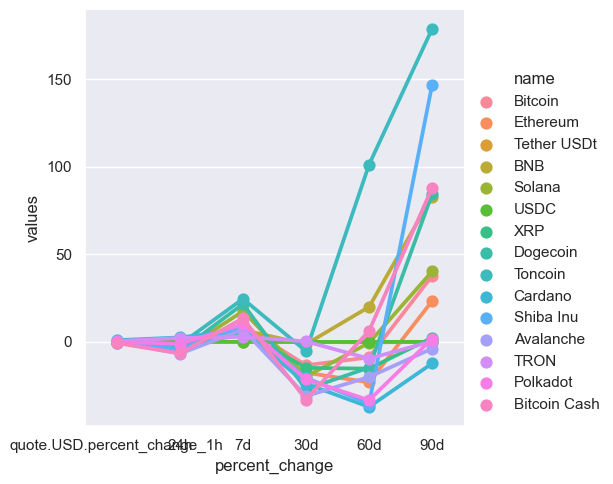

In [72]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [77]:

df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10.head()

,name,quote.USD.price,Timestamp
0,Bitcoin,62258.83645,NaT
15,Bitcoin,62258.83645,2024-05-08 19:01:06.841122
30,Bitcoin,62278.23214,2024-05-08 19:02:11.733120
45,Bitcoin,62235.92686,2024-05-08 19:03:13.564912
60,Bitcoin,62187.88151,2024-05-08 19:04:14.078600


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

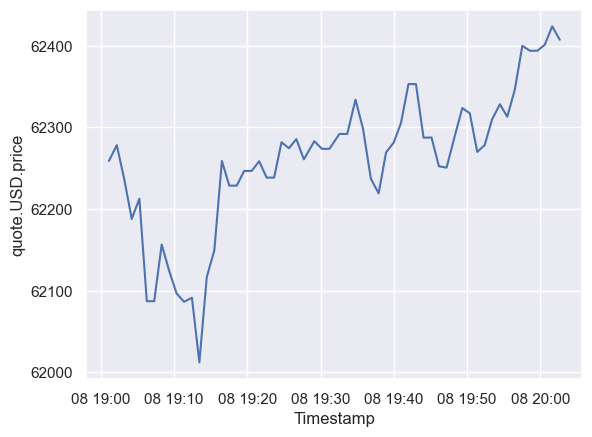

In [74]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)